In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense,Conv2DTranspose,Conv2D,Reshape,LeakyReLU,Dropout,BatchNormalization,Flatten
import numpy as np
import tensorflow as tf

2025-02-01 10:30:54.078912: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-01 10:30:54.087690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738386054.098212    6631 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738386054.101466    6631 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-01 10:30:54.112496: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


def generator(latent_dim): 
    model = keras.Sequential([
        Dense(7*7*256, use_bias=False, input_shape=(latent_dim,)),
        BatchNormalization(),
        LeakyReLU(),

        Reshape((7,7,256)),

        Conv2DTranspose(128, 5, strides=1, padding="same", use_bias=False),
        BatchNormalization(),
        LeakyReLU(),

        Conv2DTranspose(64, 5, strides=2, padding="same", use_bias=False),
        BatchNormalization(),
        LeakyReLU(),

        Conv2DTranspose(1, 5, strides=2, padding="same", use_bias=False, activation="tanh")
    ])
    
    return model


def discriminator(): 
    model = keras.Sequential([
        Conv2D(64, 5, strides=2, padding="same", use_bias=False, input_shape=(28,28,1)),
        LeakyReLU(),
        Dropout(0.3),

        Conv2D(128, 5, strides=2, padding="same", use_bias=False),
        LeakyReLU(),
        Dropout(0.3),

        Flatten(),
        Dense(1, activation="sigmoid") 
    ])
    
    return model  


cross_entropy = keras.losses.BinaryCrossentropy(from_logits=False)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)  

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)  
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) 
    return real_loss + fake_loss


latent_dim = 100
sample = 16  
gen_optimizer = keras.optimizers.Adam(learning_rate=0.001)
dis_optimizer = keras.optimizers.Adam(learning_rate=0.001)

@tf.function
def train_step(image, gen, dis, batch_size, latent_dim): 
    noise = tf.random.normal([batch_size, latent_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as dis_tape: 
        generated_images = gen(noise, training=True)

        real_output = dis(image, training=True)
        fake_output = dis(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        dis_loss = discriminator_loss(real_output, fake_output)

    gen_gradients = gen_tape.gradient(gen_loss, gen.trainable_variables)
    dis_gradients = dis_tape.gradient(dis_loss, dis.trainable_variables)

    gen_optimizer.apply_gradients(zip(gen_gradients, gen.trainable_variables))
    dis_optimizer.apply_gradients(zip(dis_gradients, dis.trainable_variables))

gen = generator(latent_dim)
dis = discriminator()
batch_size = 128

seed = tf.random.normal([sample, latent_dim])

def training(dataset, epochs, batch_size, latent_dim, gen, dis): 
    generated_images = []
    for _ in range(epochs): 
        for batch in dataset: 
            train_step(batch, gen, dis, batch_size, latent_dim)
        generated_images.append(gen(seed, training=False).numpy())
    return np.array(generated_images)


x_train = (x_train.astype("float32") - 127.5) / 127.5 
dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

val = training(dataset, 1, batch_size, latent_dim, gen, dis)

/home/rijo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/rijo/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-01 10:33:11.497658: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
import matplotlib.pyplot as plt 

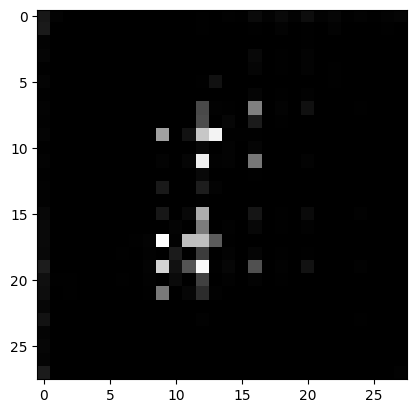

In [7]:
plt.imshow(val[-1][0,:,:,:],cmap="grey")

In [51]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [52]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2DTranspose,Conv2D,Dense,LeakyReLU,BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [53]:
def generator_function(latent_dim): 
    
    model=keras.Sequential()
    model.add(Dense(7*7*256,use_bias=False,input_shape=(latent_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7,7,256)))
    
    model.add(Conv2DTranspose(128,5,1,use_bias=False,padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(128,5,2,use_bias=False,padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1,5,2,use_bias=False,padding="same",activation="tanh"))

    return model

def discriminator_function(): 
    
    model=keras.Sequential()
    model.add(Conv2D(64,5,2,padding="same"))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128,5,2,padding="same"))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    return model


    
    

In [54]:
latent_dim=100
generator=generator_function(latent_dim)
discriminator=discriminator_function()
batch_size=128

In [55]:
cross_entropy=keras.losses.BinaryCrossentropy(from_logits=True)

In [56]:
def generator_loss(fake): 
    fake=cross_entropy(tf.ones_like(fake),fake) 
    return fake

def discriminator_loss(fake,real):
    fake=cross_entropy(tf.zeros_like(fake),fake)
    real=cross_entropy(tf.ones_like(real),real)
    return fake+real


In [57]:
gen_optimizer=keras.optimizers.Adam(learning_rate=0.001)
dis_optimizer=keras.optimizers.Adam(learning_rate=0.001)



@tf.function
def train_step(image,latent_dim,batch_size,generator,discriminator):
    noise=tf.random.normal([batch_size,latent_dim])
    with tf.GradientTape() as gen_tape , tf.GradientTape() as dis_tape: 
        generated=generator(noise,training=True)

        real=discriminator(image,training=True)
        fake=discriminator(generated,training=True)

        gen_loss=generator_loss(fake)
        dis_loss=discriminator_loss(fake,real)
        
    gen_gradient=gen_tape.gradient(gen_loss,generator.trainable_variables)
    dis_gradient=dis_tape.gradient(dis_loss,discriminator.trainable_variables)
    
    gen_optimizer.apply_gradients(zip(gen_gradient,generator.trainable_variables))
    dis_optimizer.apply_gradients(zip(dis_gradient,discriminator.trainable_variables))

    

        

        

        

In [58]:
x_train=x_train.astype("float")/255
x_train=np.expand_dims(x_train,axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [59]:
seed=tf.random.normal([16,latent_dim])

def training(dataset,epoch,batch_size,latent_dim,generator,discriminator): 
    generated_images=[]
    for _ in range(epoch):
        for batch in dataset: 
            train_step(batch,latent_dim,batch_size,generator,discriminator)
        generated_images.append(generator(seed,training=False).numpy())
    return np.array(generated_images)

dataset=tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)
val=training(dataset,1,batch_size,latent_dim,generator,discriminator)

E0000 00:00:1738393376.588646    6631 meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/sequential_15_3/leaky_re_lu_39_1/LeakyRelu/LeakyReluGrad_1' exist for missing node 'sequential_15_3/conv2d_15_1/add'.
E0000 00:00:1738393463.264363    6631 meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/sequential_15_3/leaky_re_lu_39_1/LeakyRelu/LeakyReluGrad_1' exist for missing node 'sequential_15_3/conv2d_15_1/add'.
2025-02-01 12:34:23.480104: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


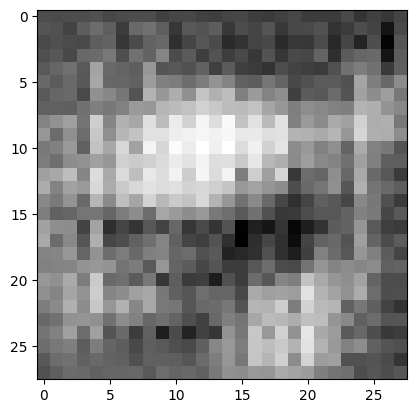

In [60]:
import matplotlib.pyplot as plt 

plt.imshow(val[-1][0,:,:,:],cmap="grey")